In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
# Importing all the basic libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
match_data = pd.read_csv('../input/ipldata/matches.csv') # Importing datafile by using location. As we know it is csv file 
match_data # visualize data in the following table

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [4]:
match_data.info()  # We get basic information about data like null values count or datatypre column name etc.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

- We can notice here some points

- City, winner, player of the match have some issue as their Non-Null value is not 756. We need to check it properly.

- umpire1,umpire2,umpire3 are the columns which are logically not affect any match. there rules and decision are same for each match. Hence there presence is not mandatory in the dataset

In [5]:
# As umpire column is not important for our datset, so removing columns
match_data.drop(columns=['umpire1','umpire2','umpire3'], inplace=True)

Removed extra or less effective columns**

In [6]:
match_data.shape #shape is used for getting column and row size

(756, 15)

In [7]:
match_data.columns #Getting all column names in the dataset


Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue'],
      dtype='object')

In [8]:
match_data.team1.unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

- Here we get aonther issue

- [ 'Rising Pune Supergiants'and 'Rising Pune Supergiant, 'Delhi Daredevils'and 'Delhi Capitals' ] are nothing but same team.but in some cases it's chsanged name will impact on our result.

- SO, here we change that name in real name.

In [9]:
match_data.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True) 
# Same team but with different name. So, we replaced it withits real and unique name

In [10]:
match_data.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)
# Same team but with different name. So, we replaced it withits real and unique name

In [11]:
match_data.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)
# Same team but with different name. So, we replaced it withits real and unique name

In [12]:
# We can see that, there are many rows in the dataset where city is not mentioned or simply NaN. We need to find it out 
match_data[match_data.city.isna()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,normal,0,Delhi Capitals,0,4,JP Duminy,Dubai International Cricket Stadium
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium


- Here by observation we can check that,

- There are NaN entries in city column. By reading such entries as shown above, we also observed that the venue mentioned in the above table is unique and that is Dubai. 

- So, logically all the matches are played in Dubai itself. So, replacing NaN with Dubai in next stage.

In [13]:
match_data.loc[[461,462,466,468,469,474,476],'city'] = 'Dubai' #As all the null cities venue is Dubai, we are going fill it with Dubai

In [14]:
match_data.loc[[461,462,466,468,469,474,476]]  # Here we can check NaN is filled with Dubai.

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
461,462,2014,Dubai,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium
462,463,2014,Dubai,2014-04-19,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,normal,0,Delhi Capitals,0,4,JP Duminy,Dubai International Cricket Stadium
466,467,2014,Dubai,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium
468,469,2014,Dubai,2014-04-25,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium
469,470,2014,Dubai,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium
474,475,2014,Dubai,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium
476,477,2014,Dubai,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium


In [15]:
match_data.info() 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             756 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
dtypes: int64(5), object(10)
memory usage: 88.7+ KB


- Now, we notice here,
- There are some NaN in 'winner' column. we need to check rows where winner is null.

In [16]:
match_data[match_data.winner.isna()] # Checking where there is NaN in winner column

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
300,301,2011,Delhi,2011-05-21,Delhi Capitals,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
570,571,2015,Bangalore,2015-05-17,Delhi Capitals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium
744,11340,2019,Bengaluru,30/04/19,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M. Chinnaswamy Stadium


- We noticed here one another problem and that is Bangalore and Bengaluru are same cities but with different names.
- So, we are going to convert it into 'Bengaluru'.

In [17]:
match_data.city.replace({'Bangalore' : 'Bengaluru'},inplace=True) # Replacing Bangalore to Begaluruby using replace function
match_data.city.unique() # Here, we can check whether there is any mistake in city name

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali'], dtype=object)

Now, our dataset is ready for further anlysis.

## Exploratory Analysis and Visualization

- In this step, we can find out some interesting patternsw and insights from data.
- we can show some ghraphs and charts to visualise the data.
- Starting it with some basic questions in mind.

In [18]:
match_data

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal"
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium
4,5,2017,Bengaluru,2017-04-08,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium


### Inference 1: Besic question- How many matches played till date in IPL?

In [19]:
match_data.id.count()

756

There are total 756 matches are played in IPL.

### Inference 2: Number of matches played in each Year

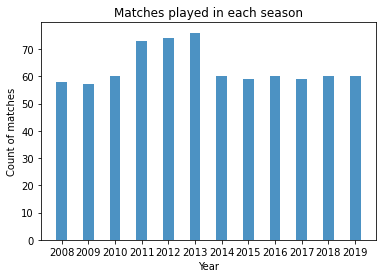

In [20]:
num_of_matches = match_data.groupby('season')[['id']].count() # Grouping all the matches and season 

plt.title('Matches played in each season') # Plot table with given title
plt.xlabel('Year')  # plotting x axis
plt.ylabel('Count of matches') #Plotting y axis
plt.xticks(num_of_matches.index) # importing number of matches played each year
plt.bar(num_of_matches.index,num_of_matches.id,width=0.4, alpha=0.8);

Here, we can observed that the no. of matches played in 2013 is highest. But why?
- Lets keep this is as usual. It will be solve in next step.

### Inference 3: Number of matches Won by Each Team

In [21]:
winner_team = match_data.groupby('winner')[['id']].count()
winner_team = winner_team.sort_values('id', ascending=False).reset_index()
winner_team.rename(columns = { 'id': 'matches_won','winner':'team'}, inplace = True)
winner_team

,team,matches_won
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Delhi Capitals,77
6,Rajasthan Royals,75
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Rising Pune Supergiant,15


<BarContainer object of 13 artists>

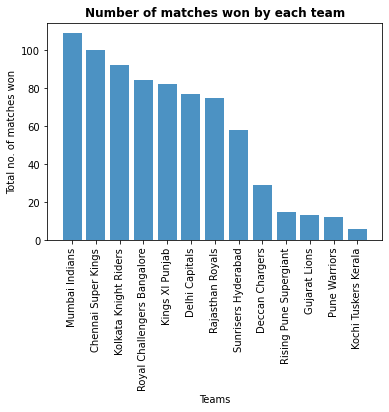

In [22]:
plt.title('Number of matches won by each team',fontweight=800)
plt.xlabel('Teams')
plt.ylabel('Total no. of matches won')
plt.xticks(rotation=90,fontsize=10)
plt.bar(winner_team.team,winner_team.matches_won, alpha=0.8)

- Here are teams which won matches from top to bottom.

- But here are we can say that why Kochi Tuskers Kerala and Pune Warriors and Gujarat Lions are teams are very less won match?

In [23]:
# Inference 4: Number of matches hosted by each city

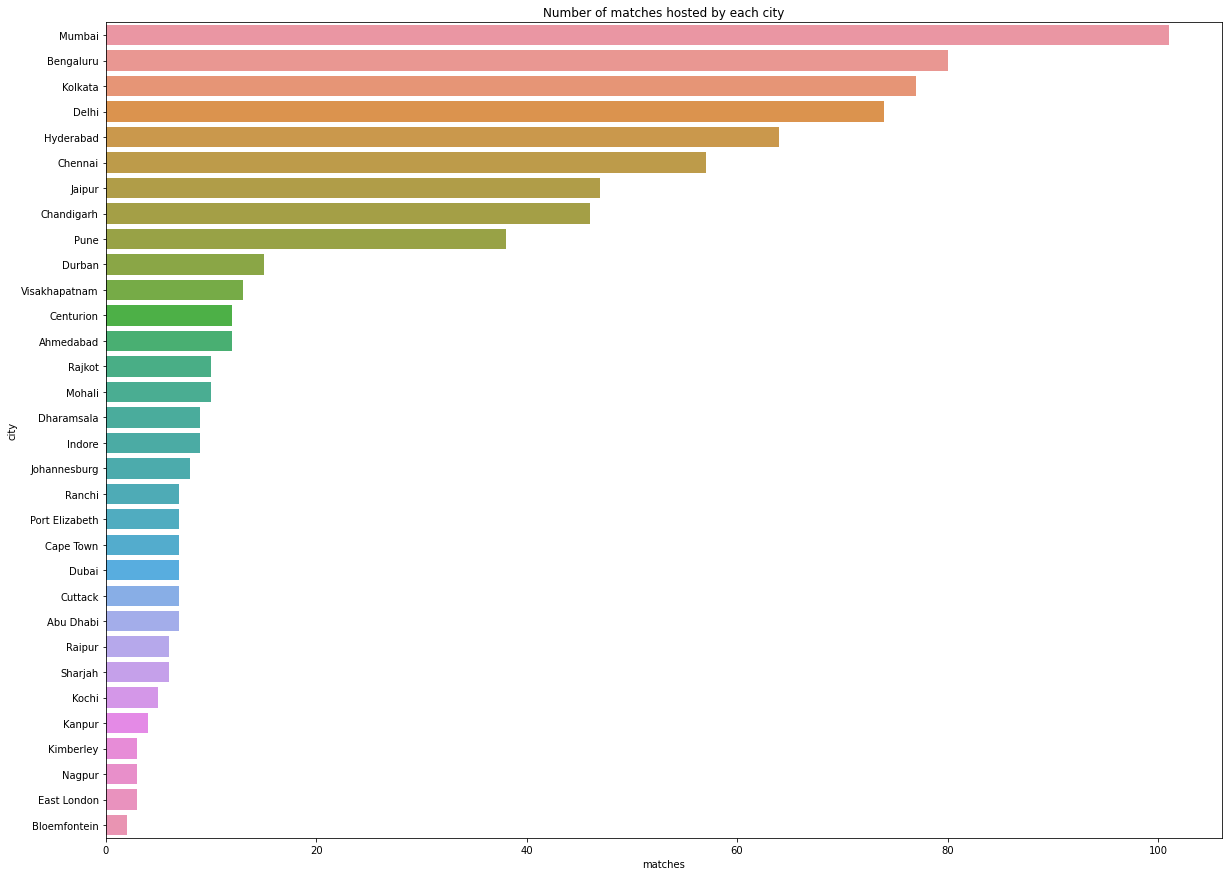

In [24]:
city_name = match_data.groupby('city')[['id']].count()
city_name=city_name.sort_values('id', ascending=False).reset_index()
city_name.rename(columns = { 'id': 'matches'}, inplace = True)

plt.figure(figsize=(20, 15))
plt.title('Number of matches hosted by each city')
sns.barplot(y='city', x='matches', data=city_name);

- Mumbai tops the list to host IPL matches

### Inference 5: Hightest No. of IPL Title winner 

In [25]:
final_match_win = match_data.groupby('season').tail(1).sort_values('season').reset_index()
final_match_win['winner'].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Deccan Chargers          1
Sunrisers Hyderabad      1
Rajasthan Royals         1
Name: winner, dtype: int64

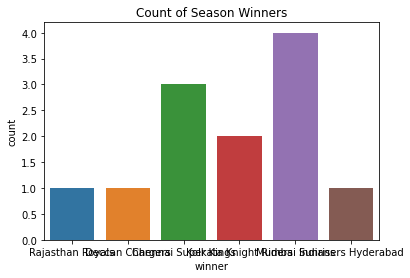

In [26]:
plt.title('Count of Season Winners')
sns.countplot(x=final_match_win['winner']);

- Here, we can say that the Most IPL titles are winning by Mumbai Indians.

### Inference 6: Highest No. of second runner up team

In [27]:
second_runnerup = pd.concat([final_match_win['team1'],final_match_win['team2']])
second_runnerup.value_counts()

Chennai Super Kings            8
Mumbai Indians                 5
Royal Challengers Bangalore    3
Sunrisers Hyderabad            2
Kolkata Knight Riders          2
Kings XI Punjab                1
Deccan Chargers                1
Rajasthan Royals               1
Rising Pune Supergiant         1
dtype: int64

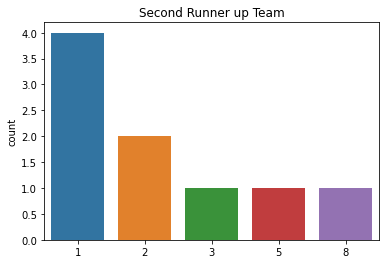

In [28]:
plt.title('Second Runner up Team')
sns.countplot(x=second_runnerup.value_counts());

- Here we get to know that Chennai Super Kings is the team with maximun number of runner up team.

### These insights arises some questions in my mind. Lets try to solve these questions for better understanding.

#Question 1: Players who win Highest no of Man of the Match Title?

In [29]:
mom_count =match_data.groupby('player_of_match')[['id']].count()
mom_count = mom_count.sort_values('id',ascending=False).head(10)
mom_count

,id
player_of_match,
CH Gayle,21
AB de Villiers,20
MS Dhoni,17
DA Warner,17
RG Sharma,17
YK Pathan,16
SR Watson,15
SK Raina,14
G Gambhir,13


- All are best players in the world. But, In terms of IPL performer, CH Gayle is the best who wons maximum man of the match.

#Question 2: In inference 3, bottom teams won less matches. But why?

In [30]:
matches_team = pd.concat([match_data['team1'],match_data['team2']])
matches_team_df=matches_team.value_counts().reset_index()  
matches_team_df.columns=['team','total_matches']   
matches_team_df.set_index('team',inplace=True)     
merged_stats_df=matches_team_df.merge(winner_team,on='team')
merged_stats_df['winning_percent'] = (merged_stats_df.matches_won/merged_stats_df.total_matches)*100
merged_stats_df

,team,total_matches,matches_won,winning_percent
0,Mumbai Indians,187,109,58.288770
1,Royal Challengers Bangalore,180,84,46.666667
2,Kolkata Knight Riders,178,92,51.685393
3,Delhi Capitals,177,77,43.502825
4,Kings XI Punjab,176,82,46.590909
5,Chennai Super Kings,164,100,60.975610
6,Rajasthan Royals,147,75,51.020408
7,Sunrisers Hyderabad,108,58,53.703704
8,Deccan Chargers,75,29,38.666667
9,Pune Warriors,46,12,26.086957


- Here is the fact,

1. Deccan Chargers, Pune Warriors, Gujarat Lions, Rising Pune Supergiant, Kochi Tuskers Kerala are comparatively less played matches. Either their team is not played some IPL seasons or Their team is merged withanother team.

2. Whatever may be the reason, but we can not say these are worst performing team but we can say that these are less played team.

#Question 3: If MI is Highest winner and CSK is Highest Runner up in terms of Winning. Then Who wins most matches in between?

In [31]:
mi_csk=match_data[((match_data.team1 =="Mumbai Indians") & (match_data.team2 =="Chennai Super Kings")) | 
                  ((match_data.team2 =="Mumbai Indians") & (match_data.team1 =="Chennai Super Kings"))]
mi_csk['winner'].value_counts()

Mumbai Indians         17
Chennai Super Kings    11
Name: winner, dtype: int64

- Mumbai Indians won 17 and Chennai Super Kings won 11 matches in opposite.

#Question 4: Why number of matches played in different  season is different?

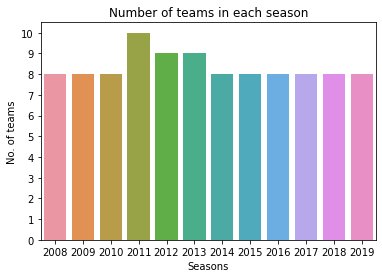

In [32]:
team_count=[];
for i in range(2008,2020):
    team_count.append(match_data[match_data.season == i].team1.unique().shape[0])

sns.barplot(x=np.arange(2008,2020),y=team_count)
plt.title('Number of teams in each season')
plt.xlabel('Seasons')
plt.ylabel('No. of teams')
plt.yticks(np.arange(0,11));

- So, As we can see in above graph, The number of teams playing in IPL are differentin different season.

- Hence no. of total matches played in different season is different.

#Question 5: How can we find out Toss winning tem is Match winner too?

In [33]:
match_toss_winner_df = match_data[match_data['toss_winner']==match_data['winner']]

match_toss_winner_df = match_toss_winner_df[match_toss_winner_df.result != 'tie']

count_toss_winner_decision_df = match_toss_winner_df['toss_decision'].value_counts() 

toss_loser_match_winner_df = match_data[match_data['toss_winner']!=match_data['winner']] 

toss_loser_match_winner_df = toss_loser_match_winner_df[toss_loser_match_winner_df.result != 'tie']

count_toss_decision_loser_df = toss_loser_match_winner_df['toss_decision'].value_counts()

team_bat_first_won =count_toss_decision_loser_df.field+count_toss_winner_decision_df.bat

print('Total number of matches where team batting first is the winner of the match is {}'.format(team_bat_first_won))

Total number of matches where team batting first is the winner of the match is 350


- So here is the output. There are total 350 matches in which toss winning team is the match winning team as well.

# Inferences and Conclusion

- The analysis of the IPL dataset gives us some interesting trends and output.

- Mumbai Indians is Highest Title winner team where as Chennai Super Kings is Highest Second Runner up team in IPL History.

- Highest matches hosted are in the Mumbai and lowest matches hosted are in Bloemfontein.

- Though Mumbai Indians won highest Titles, The winning percentage of the overall matches is winning titled to Chennai super kings upto 61% approx.

- In near about 50 % of the matches, THe top winning team is match winning team.

- Eventhough Highest number of teams participated in 2011 IPL season, maximun matches are palyed in 2013 season. Quite interesting. Yes?? :-)

# References and Future Work

- By Adding more columns like score, wickets, Bowler etc to dataset will change many insights.
- one more evertime issue 'DRS (Decision Review System)' is not mentioned in dataset which is quite important to check anf find pattern.
- If there is addition of Wrong decision table which will may improve game quality in future.



References:
- Numpy Library
- pandas library
- kaggle website and perticular dataset